
# Credit Scoring Model 🏦

## Objective
The goal of this project is to **predict an individual's creditworthiness** based on their financial data.  
We experiment with three models:
- Logistic Regression
- Decision Tree
- Random Forest

We compare their performance using key metrics: **Accuracy, Precision, Recall, F1-score, and ROC-AUC**.


In [1]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
)


## Data Loading & Initial Exploration

In [2]:

# Load dataset
df = pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv") 

# Show first rows and info
display(df.head())
df.info()
df.isnull().sum()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

## Data Preprocessing

In [3]:

# Handle missing values
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

# Encode categorical variables
cat_cols = df.select_dtypes(include="object").columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Define features and target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/tmp/ipykernel_36/3350929020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
/tmp/ipykernel_36/3350929020.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

## Modeling

In [4]:

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:,1]

# Decision Tree
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:,1]

# Random Forest
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]


## Evaluation

In [5]:

# Store results
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        classification_report(y_test, y_pred_lr, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision']
    ],
    "Recall": [
        classification_report(y_test, y_pred_lr, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall']
    ],
    "F1-score": [
        classification_report(y_test, y_pred_lr, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score']
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_dt),
        roc_auc_score(y_test, y_proba_rf)
    ]
}

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.813871,0.552068,0.779184,0.646253,0.871207
1,Decision Tree,0.890133,0.739484,0.766526,0.752762,0.845579
2,Random Forest,0.932177,0.963138,0.716596,0.821774,0.931274


## Visualization of Results

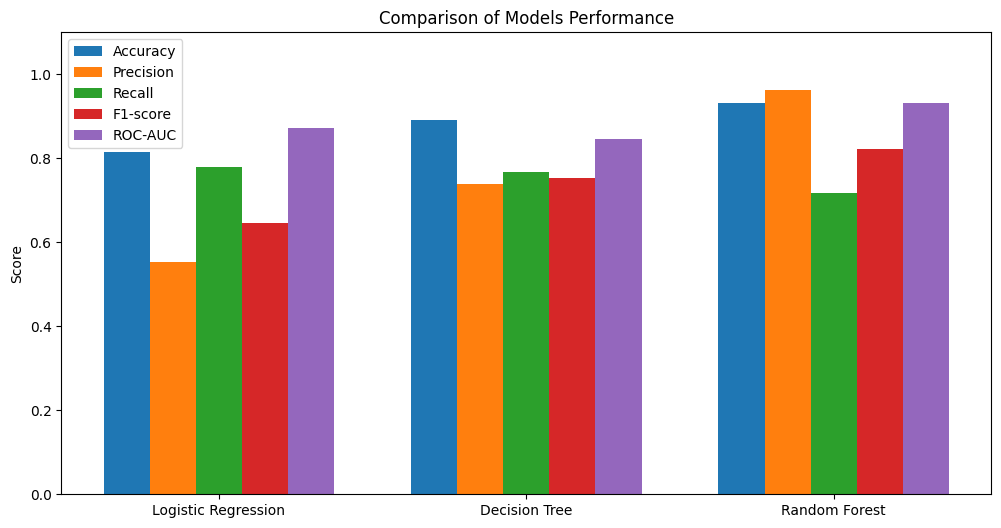

In [6]:

# Bar chart comparison
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]
x = np.arange(len(results_df["Model"]))
width = 0.15

plt.figure(figsize=(12,6))
for i, metric in enumerate(metrics):
    plt.bar(x + i*width, results_df[metric], width, label=metric)

plt.xticks(x + width*2, results_df["Model"])
plt.ylabel("Score")
plt.title("Comparison of Models Performance")
plt.legend()
plt.ylim(0, 1.1)
plt.show()


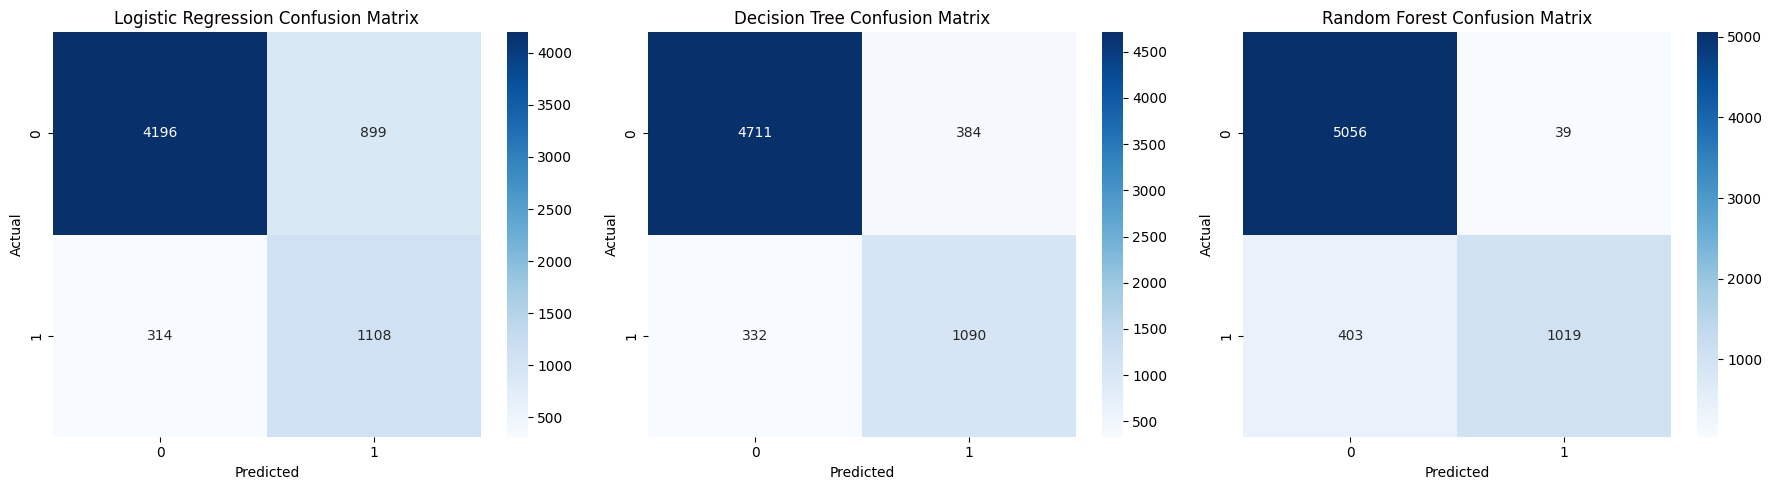

In [7]:

# Confusion Matrix Heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for ax, model_name, y_pred in zip(
    axes,
    ["Logistic Regression", "Decision Tree", "Random Forest"],
    [y_pred_lr, y_pred_dt, y_pred_rf]
):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


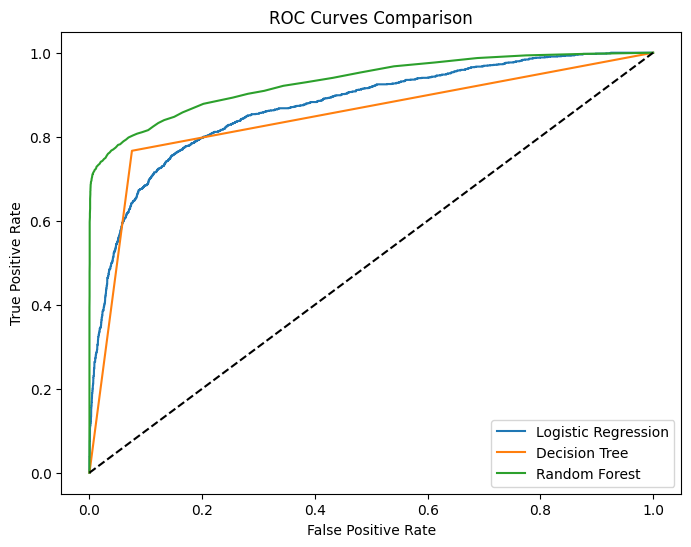

In [8]:

# ROC Curves
plt.figure(figsize=(8,6))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()



## Conclusion ✅

- **Random Forest** achieved the best overall performance with the highest ROC-AUC and balanced precision-recall.  
- **Decision Tree** also performed well but slightly less stable.  
- **Logistic Regression** worked as a good baseline but struggled with precision.

👉 Final recommendation: **Random Forest** is the most suitable model for this dataset.
